In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import os
import seaborn as sns

In [2]:
pulsar_df = pd.read_csv('Data/pulsar_data.csv', sep=',')
print("Kích thước bộ dữ liệu:", pulsar_df.shape)
pulsar_df.head()

Kích thước bộ dữ liệu: (12528, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
cols = pulsar_df.columns
cols

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [4]:
pulsar_df.columns = pulsar_df.columns.str.strip()

<AxesSubplot:>

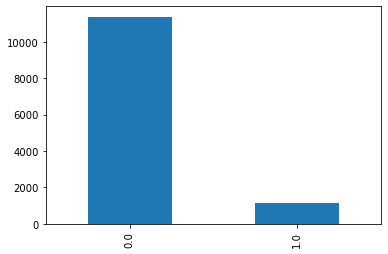

In [5]:
pulsar_df.iloc[:, -1].value_counts().plot(kind='bar')

In [6]:
pulsar_df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [7]:
pulsar_df.dropna(inplace=True)

In [8]:
pulsar_df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

In [9]:
pulsar_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [10]:
pulsar_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


In [11]:
def plot_boxplots_outlier(col_name, i):
    plt.subplot(4, 2, i)
    fig = pulsar_df.boxplot(column=col_name)
    fig.set_title("")
    fig.set_ylabel(col_name)


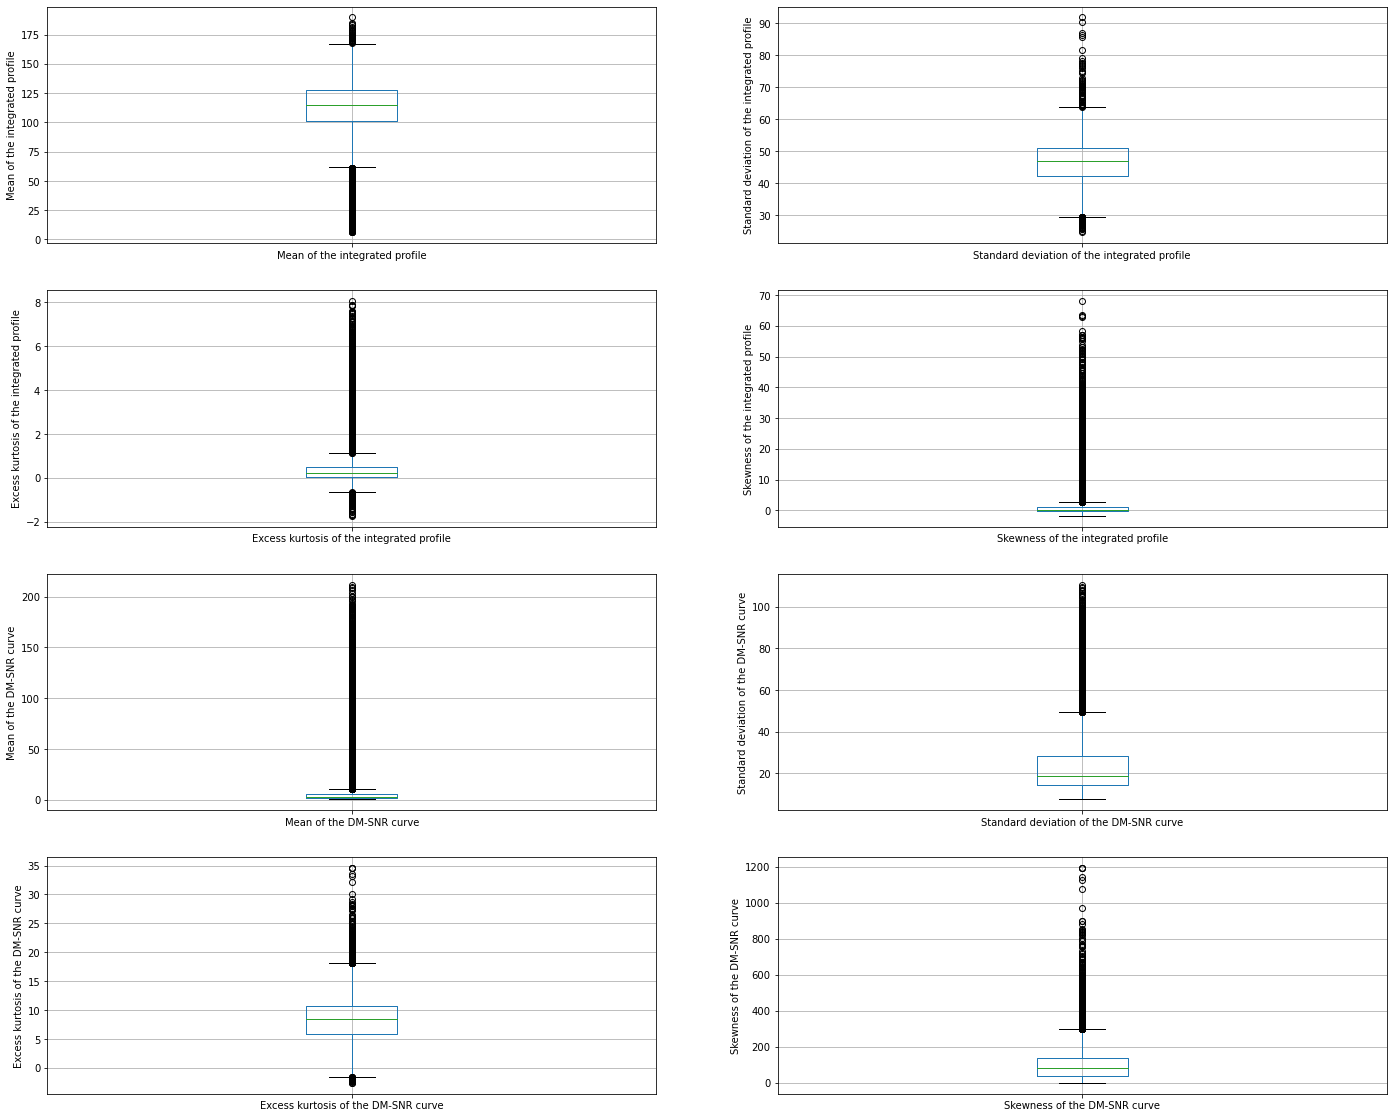

In [12]:
plt.figure(figsize=(24, 20))
for i, col_name in enumerate(pulsar_df.columns[:-1]):
    plot_boxplots_outlier(col_name, i + 1)


In [13]:
def plot_distribution(col_name, i):
    plt.subplot(4, 2, i)
    fig = pulsar_df[col_name].hist(bins=20)
    fig.set_xlabel(col_name)
    fig.set_ylabel("Number of pulsar stars")

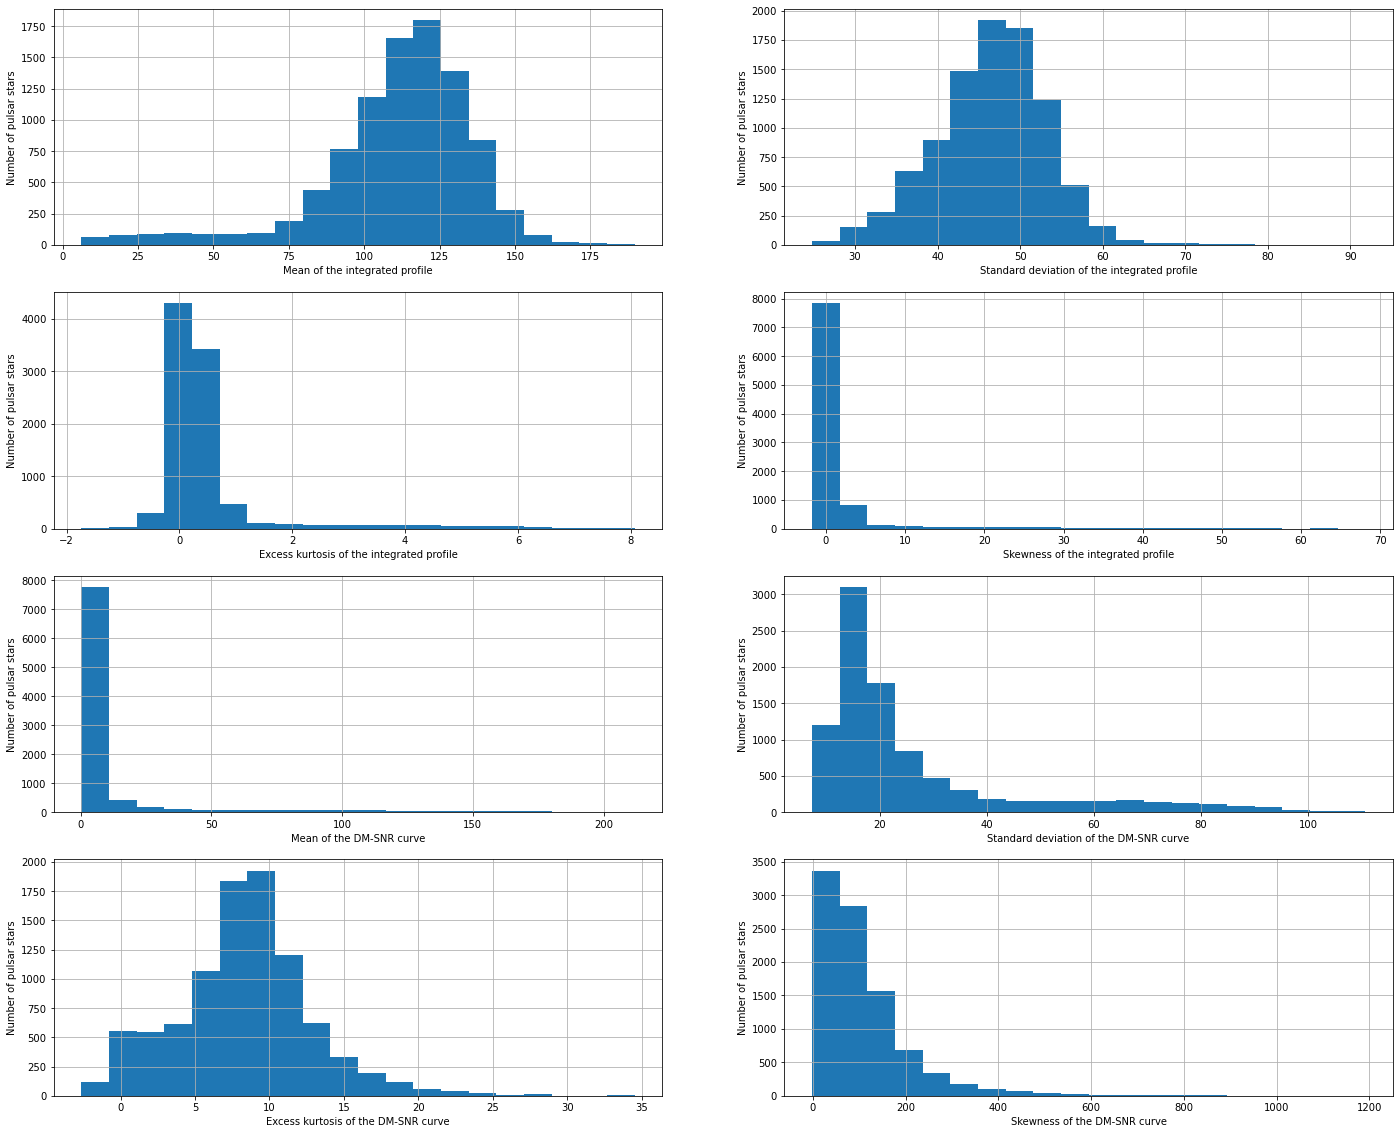

In [14]:
plt.figure(figsize=(24, 20))
for i, col_name in enumerate(pulsar_df.columns[:-1]):
    plot_distribution(col_name, i + 1)

In [15]:
from sklearn.preprocessing import StandardScaler

X = pulsar_df.drop(pulsar_df.columns[-1:], axis=1)
y = pulsar_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [16]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9784366576819407
Confusion matrix: [[1670    5]
 [  35  145]]


In [20]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=10, n_jobs=-1, train_sizes=[1.0], scoring='accuracy')
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel="Accuracy"):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt. errorbar(X, Y, error, linestyle="None", marker="o")

100%|██████████| 4/4 [00:20<00:00,  5.07s/it]


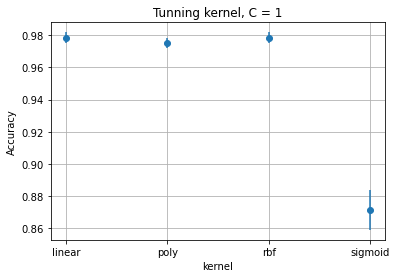

In [21]:
title = "Tunning kernel, C = 1"
xlabel = "kernel"
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mean_scores = []
errors = []

for kernel in tqdm(kernels):
    svm_clf = svm.SVC(kernel = kernel, C = 1)
    mean, std = cross_validation(svm_clf)
    mean_scores.append(mean)
    errors.append(std)

plot(title, xlabel, kernels, mean_scores, errors)

if (os.path.exists('images') == False):
    os.makedirs('images')

plt.savefig('images/svm_tunning_kernel.png', bbox_inches="tight")
plt.show()



100%|██████████| 7/7 [00:37<00:00,  5.36s/it]


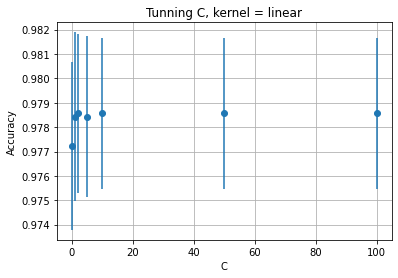

In [50]:
title = "Tunning C, kernel = linear"

xlabel = "C"
C_list = [0.1, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0]
mean_scores = []
errors = []

for C in tqdm(C_list):
    svm_clf = svm.SVC(kernel = "linear", C = C)
    mean, std = cross_validation(svm_clf)
    mean_scores.append(mean)
    errors.append(std)

plot(title, xlabel, C_list, mean_scores, errors)

if (os.path.exists('images') == False):
    os.makedirs('images')

plt.savefig('images/svm_tunning_C.png', bbox_inches="tight")
plt.show()




In [51]:
svm_clf = svm.SVC(kernel = "linear", C = 2)
svm_clf.fit(X_train, y_train)
y_test_pred = svm_clf.predict(X_test)
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))

Test Accuracy Score: 0.9789757412398922


In [52]:
svm_clf = svm.SVC(kernel = "linear", C = 2)
svm_clf.fit(X_train, y_train)
y_train_pred = svm_clf.predict(X_train)
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))

Train Accuracy Score: 0.9785656511188999


In [53]:
class_freq_list = np.bincount(y_test)

null_accuracy_score = class_freq_list[0] / (class_freq_list[0] + class_freq_list[1])
print("Null Accuracy Score:", null_accuracy_score)

Null Accuracy Score: 0.9029649595687331


<AxesSubplot:>

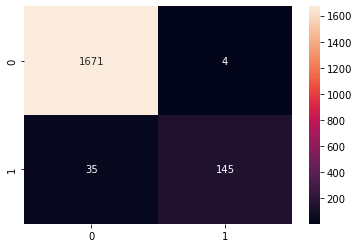

In [54]:
cm_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_test_pred))
sns.heatmap(cm_matrix, annot=True, fmt='d')